# **Nonlinear Models**
---
## **Summary**
to be added ..
    
## **References**
1. Goodfellow, I., Bengio, Y., Courville, A. 2016. Deep Learning. MIT Press.
2. Geron, A. 2017. Hands-On Machine Learning with Scikit-Learn & TensorFlow. O'Reily.
3. Albon, C. 2018. Python Machine Learning Cookbook. O'Reily.
4. IBM Data Science Professional Certificate Program. 2018. 
5. MIT Data Science and Big Data Cerfiticate Program. 2019.

## **Concept**
### **Polynomial Regression**

* single variable
    * $y_i = \alpha + \beta_1 x^2 + \dots + \beta_i x^i + \varepsilon_i$
* multiple variable
    * example (2 variables): $\hat{y} = \alpha + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1 X_2 + \beta_4 X_1^2 + \beta_5 X_2^2 + \varepsilon$
    
#### **Regularization**
* Reduce the degrees

### **Logistic Regression**
* probabilty estimation: $\hat{p} = h_\theta(x) = \sigma(\theta^T\cdot{x})$
* sigmoid function (s-shaped): $\sigma(\cdot)$
* logistic function: $\sigma(t) = \frac{1}{1+e^{-t}}$
* prediction: $$\begin{equation}
                   \hat{y} =\left\{
                   \begin{array}{@{}ll@{}}
                      0 & \text{if } \hat{p} < 0.5, \\
                      1 & \text{if } \hat{p} \geq{0.5}.
                   \end{array}\right.
                \end{equation}$$

#### **Cost function**
* single training instance: $$\begin{equation}
                               c(\theta) =\left\{
                               \begin{array}{@{}ll@{}}
                                   -log(\hat{p})      & \text{if } y = 1, \\
                                   -log(1 - \hat{p}) & \text{if } y = 0.
                               \end{array}\right.
                             \end{equation}$$

* cost function of all instance: $$J(\theta) = -\frac1{m}\sum_{i=1}^m[y^i log(\hat{p}^i)+(1-y^i)log(1-\hat{p}^i)]$$

* **convex** $\Longrightarrow$ Gradient Descent **GUARANTEES** the global minimum
    * logistic cost function partial deriviatives: $$\frac{\partial}{\partial{\theta}_j}J(\theta)=\frac1{m}\sum_{i=1}^m(\sigma(\theta^T\cdot{x^i})-y^i)x_j^i$$

### **Softmax Regression**
* support multiple classes 
* no need to train and combine multiple binary classifiers

#### **Softmax Function**
* 1. compute a score $s_k(x)$ for each class k, given an instance x: $s_k(x)=\theta_k^T\cdot{x}$
* 2. apply softmax function to the score to estimate the probablity of each class
* 3. each class: own dedicated parameter vector $\theta_k$ 
* 4. together: all $\theta_k$ stored as rows in a parameter matrix $\Theta$.
* 5. finally: $$\hat{p}_k=\sigma(s(x))_k=\frac{exp(s_k(x))}{\displaystyle\sum_{j=1}^K exp(s_j(x))}$$\
    **K**: the number of classes\
    **s(x)**: a vector containing the socres of each class for the instance x\
    __$\sigma(s(x))$__: the estimated probablity that the instance x belongs to class k given the scores of each class for that instance

#### **Prediction**
$\DeclareMathOperator*{\argmax}{arg\max}$
$$\hat{y} = \argmax_k \sigma(s(x))_k = \argmax_k s_k(x)= \argmax_k(\theta_k^T\cdot{x}) $$
* Predicting the highest estimated probablity (simply the class with the highest score) <br>
* argmax operator returns the value of a variable that maximizes a function
* returns the value of k that maximizes the estiamted probablity $\sigma(s(x))_k$.

#### **Cross entropy**
* minimize the cost function
* measure how well a set of estimated class probablities match the target clases

* Cross entropy cost function: $$J(\Theta)=-\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^K y_k^i log(\hat{p}_k^i)$$
    * $y_k^i$ = 1, if the targe class for the *i*th instance is _k_;
    * y = 0 otherwise
    * K = 2, equivalent to the Logistic Regression's cost function
    * cross entropy $$H(p, q)= -\sum_x p(x)\log  q(x)$$
    * **The gradient vector of the cost function with regard to $\theta_k$**: $$\nabla\theta_kJ(\Theta)=\frac{1}{m}\sum_{i=1}^m(\hat{p}_k^i-y_k^i)x^i$$
    * Compute gradient vector for each class, then use Gradient Descent (or other optimazaiton algorithm) to find the parameter matrix $\Theta$ that minimize the cost function.

### 5. Pipelines
Data Pipelines simplify the steps of processing the data. We use the module  **Pipeline** to create a pipeline. We also use **StandardScaler** as a step in our pipeline.

### 6. Measures for In-Sample Evaluation

When evaluating our models, not only do we want to visualise the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

- **$R^2$ / R-squared**
- **Mean Squared Error (MSE)**

**R-squared**

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.
The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.



**Mean Squared Error (MSE)**

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).


## **Examples**
### **Polynomial Regression**

### **Logistic Regression**
**Decision boundary**: iris example

In [9]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
print(list(iris.keys()))

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


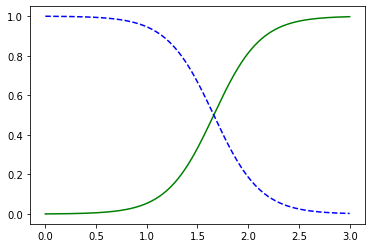

array([1, 0, 0])

In [10]:
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

# look at the model's probalities for flowers with petal widths varying from 0 to 3 cm
X_new =  np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label = 'iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label = 'Not iris-Virginica')
plt.show()

# prediction example
log_reg.predict([[1.7], [1.61], [1.62]]) # as see the cut-off point around 1.61

In [5]:
# logistic regression with l1 penalty
log_reg_l1 = LogisticRegression(penalty='l1')
log_reg_l1.fit(X, y)

# look at the model's probalities for flowers with petal widths varying from 0 to 3 cm
X_new =  np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg_l1.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label = 'iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label = 'Not iris-Virginica')
plt.show()

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

* **logistic regression with l1 penalty**
* **sklearn default to set l2 penalty with logistic regression**

In [6]:
log_reg_l2 = LogisticRegression(penalty='l2')
log_reg_l2.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

* **look at the model's probalities for flowers with petal widths varying from 0 to 3 cm**

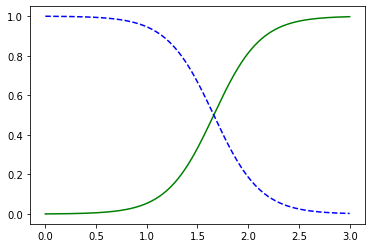

In [7]:
X_new =  np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg_l2.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label = 'iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label = 'Not iris-Virginica')
plt.show()

### **Softmax regression**

In [8]:
# EXAMPLE
# 'lbfgs' support the Softmax Regression
# 'l2' regularization is controlled by hyperparameter C

X = iris['data'][:, (2, 3)] ## petal widths
y = iris['target']

softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C =10)
softmax_reg.fit(X, y)

print(softmax_reg.predict([[5, 2]]))
print(softmax_reg.predict_proba([[5, 2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]
